In [1]:
pip install pandas

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

#### 1. titanic 파일을 불러오고 embarked를 기준으로 countplot()함수를 그리시오.

In [3]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='embarked', ylabel='count'>

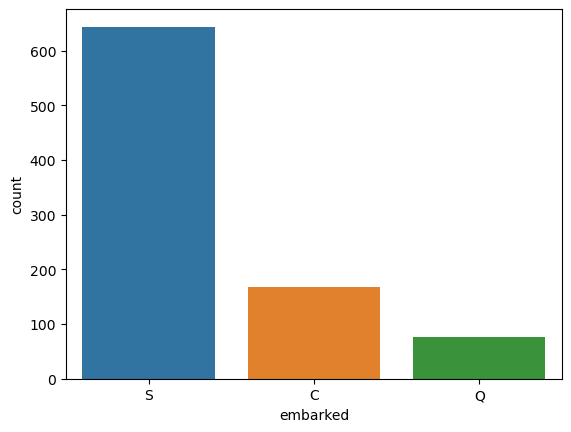

In [4]:
sns.countplot(data = df, x ='embarked')

#### 2. 아래의 표를 데이터 프레임으로 만드시오.

In [5]:
testDf = pd.DataFrame({'' : ['김정수', '이희진', '박진영'],
                      '영어' : [98, 85, 75],
                      '수학' : [80, 75, 60],
                      '과학' : [95, 85, 75],
                      '사회' : [70, 85, 80]})
testDf

,,영어,수학,과학,사회
0,김정수,98,80,95,70
1,이희진,85,75,85,85
2,박진영,75,60,75,80


#### 1) 총점을 파생변수로 만들어 넣으시오.

In [6]:
testDf['총점'] = testDf['영어'] + testDf['수학'] + testDf['과학'] + testDf['사회']
testDf

,,영어,수학,과학,사회,총점
0,김정수,98,80,95,70,343
1,이희진,85,75,85,85,330
2,박진영,75,60,75,80,290


#### 2) 평균을 파생변수를 만들어 넣으시오.

In [7]:
testDf['평균'] = (testDf['총점'] / 4)
testDf

,,영어,수학,과학,사회,총점,평균
0,김정수,98,80,95,70,343,85.75
1,이희진,85,75,85,85,330,82.50
2,박진영,75,60,75,80,290,72.50


#### 3. mpg파일을 이용하여 등급표의 기준을 활용하고 중첩 조건문을 활용하여 연비 등급 변수를 만들고 빈도표와 막대그래프를 그리시오.

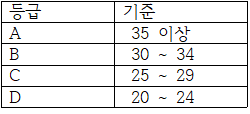

In [8]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [9]:
mpg['통합연비'] = (mpg['cty'] + mpg['hwy'])/ 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,통합연비
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [10]:
mpg['연비등급'] = np.where(mpg['통합연비'] >= 35, 'A',
                 np.where(mpg['통합연비'] >= 30, 'B',
                 np.where(mpg['통합연비'] >= 25, 'C', 'D')))
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,통합연비,연비등급
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,D
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,C
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,C
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,C
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,D


In [11]:
countGrade = mpg['연비등급'].value_counts().sort_index()
countGrade

A      3
B      7
C     33
D    191
Name: 연비등급, dtype: int64

<Axes: >

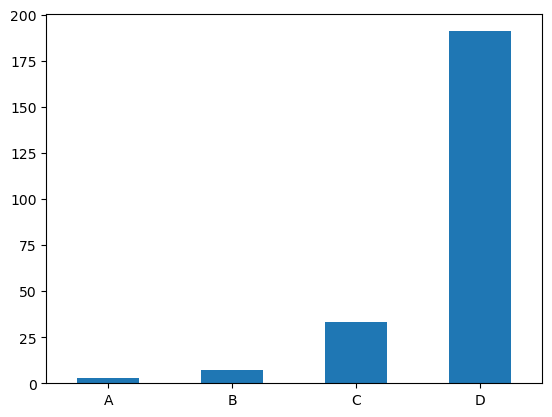

In [12]:
countGrade.plot.bar(rot = 0)